In [1]:
import pandas as pd
import numpy as np
import autoEDA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score


%matplotlib inline


In [23]:
df = pd.read_csv('final_project.csv')
df.shape

(160000, 51)

In [24]:
df['y'].mean()

0.40123125

In [25]:
df[['x24', 'x29', 'x30', 'x32','x37']]

x24   x29        x30     x32        x37
0       euorpe  July    tuesday    0.0%   $1313.96
1         asia   Aug  wednesday  -0.02%   $1962.78
2         asia  July  wednesday  -0.01%    $430.47
3         asia  July  wednesday   0.01%  $-2366.29
4         asia  July    tuesday   0.01%   $-620.66
...        ...   ...        ...     ...        ...
159995    asia   Aug  wednesday    0.0%   $-891.96
159996    asia   May  wednesday  -0.01%   $1588.65
159997    asia   Jun  wednesday   -0.0%    $687.46
159998    asia   May  wednesday  -0.02%    $439.21
159999    asia   Aug    tuesday   0.02%  $-1229.34

[160000 rows x 5 columns]

In [26]:
df['x32'] = df['x32'].str.rstrip('%')
df['x37'] = df['x37'].str.lstrip('$')
df = df.astype({'x32': 'float', 'x37': 'float'})
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32    float64
x33    float64
x34    float64
x35    float64
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

In [27]:
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [28]:
df.isnull().sum(axis=1).max()

1

In [29]:
non_num = ['x24', 'x29', 'x30']
for col in df:
    if col not in non_num:
        df[col] = df[col].fillna(0)

for col in non_num:
    print(df[col].mode())

df['x24'] = df['x24'].fillna('asia')
df['x29'] = df['x29'].fillna('July')
df['x30'] = df['x30'].fillna('wednesday')

0    asia
dtype: object
0    July
dtype: object
0    wednesday
dtype: object


In [30]:
df.isna().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [81]:
target = 'y'
eda = autoEDA.ClassificationEDA(df, target)

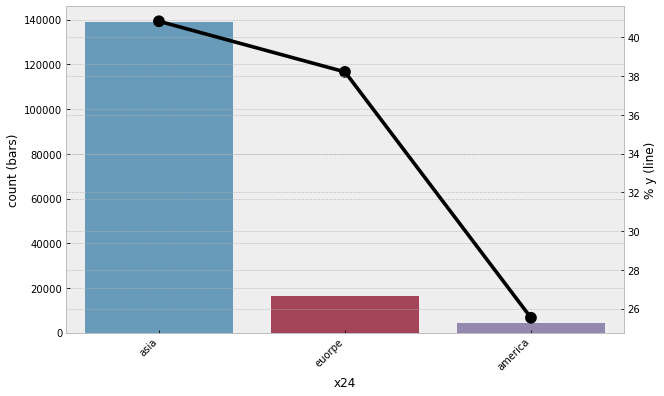

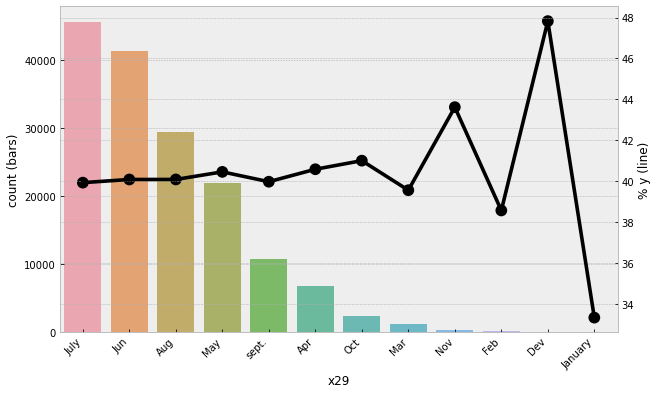

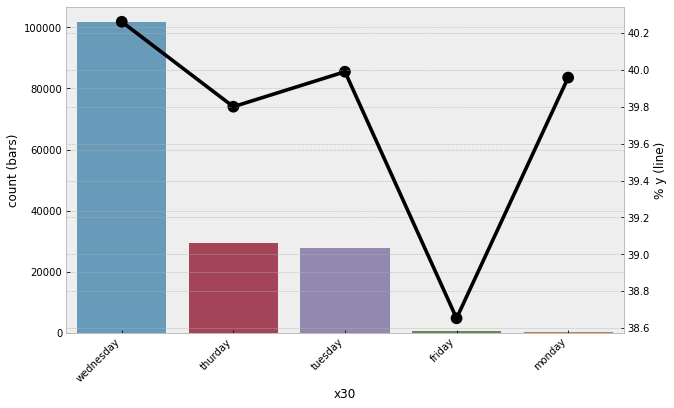

In [66]:
eda.plot_categorical(cols=['x24', 'x29', 'x30'])

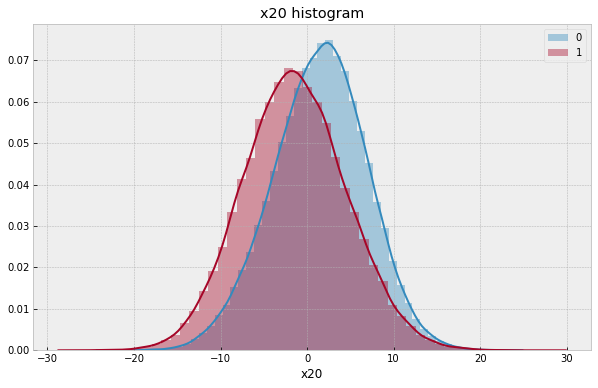

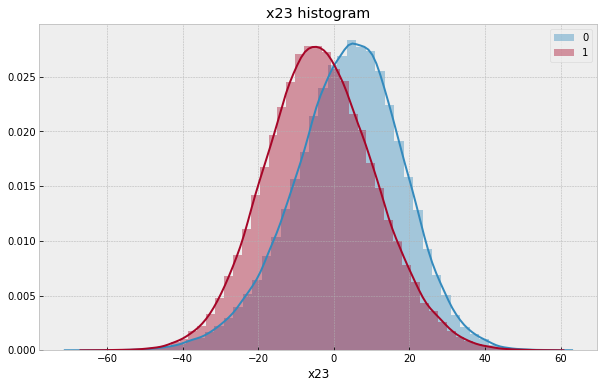

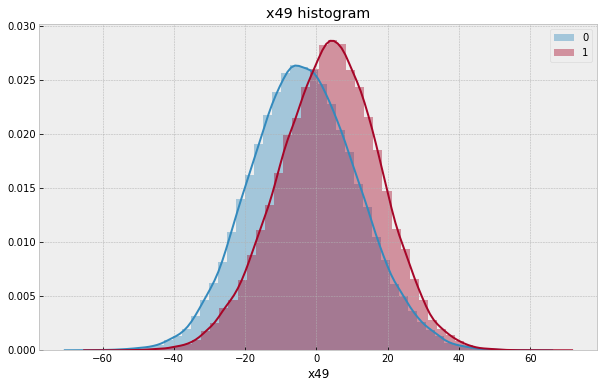

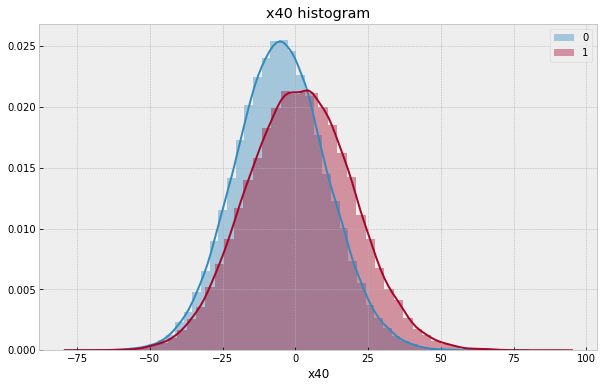

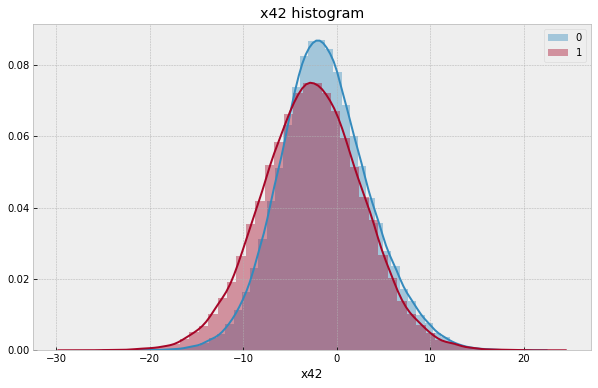

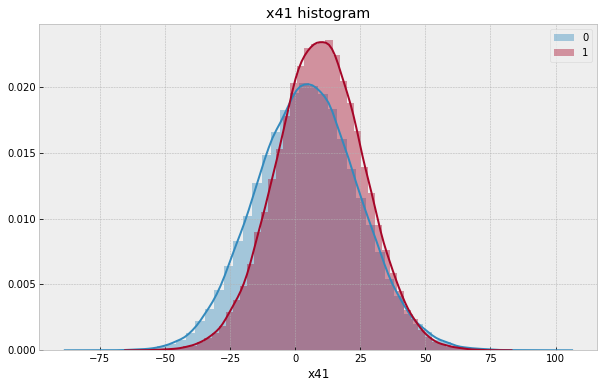

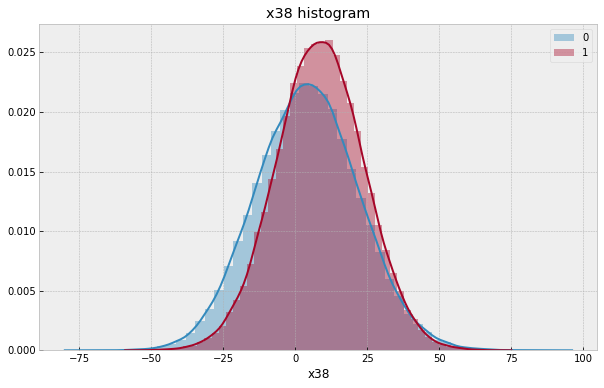

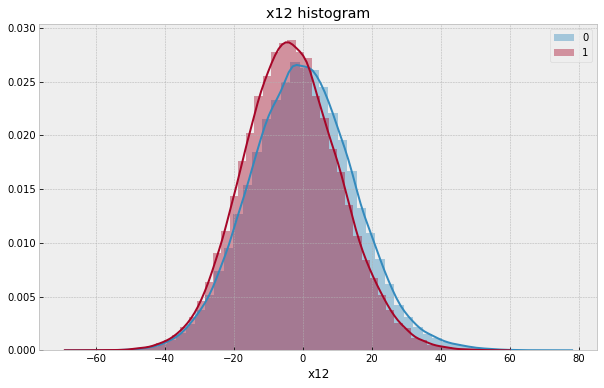

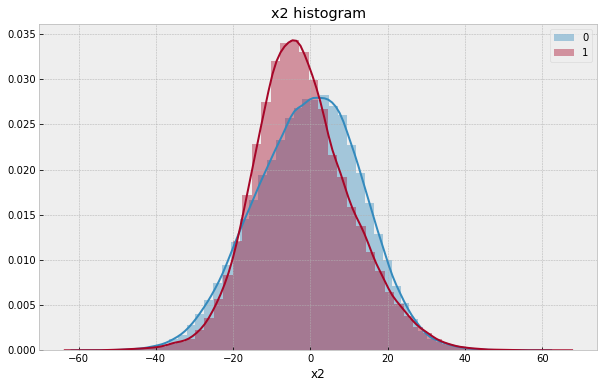

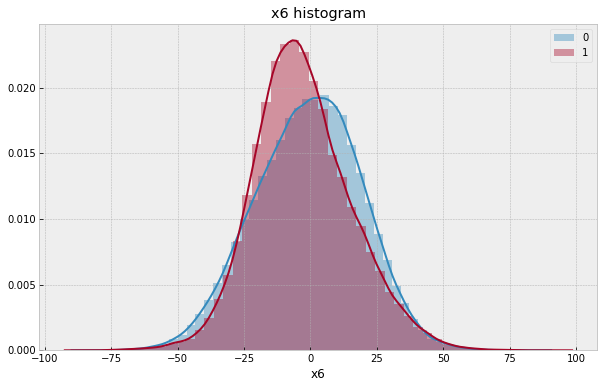

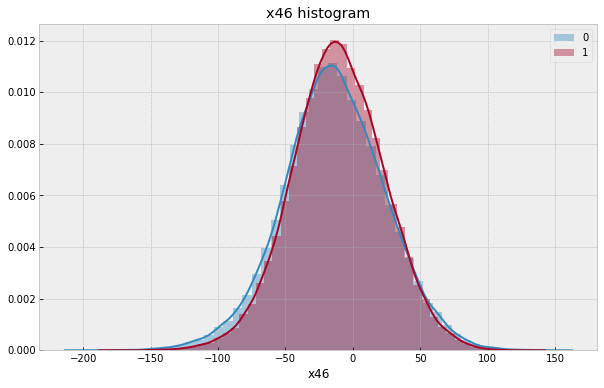

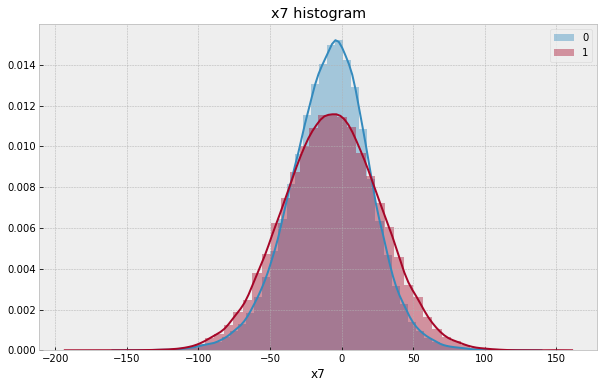

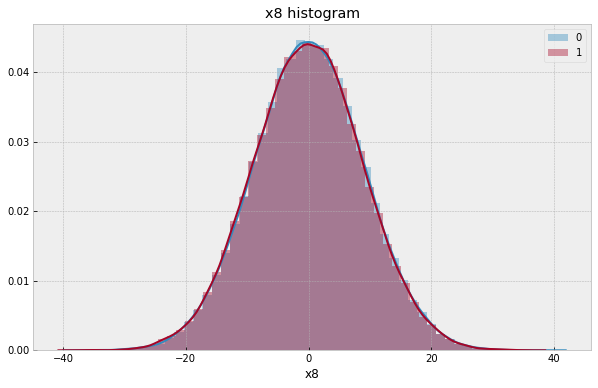

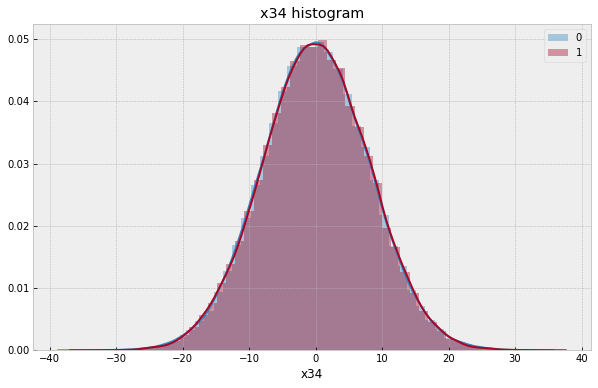

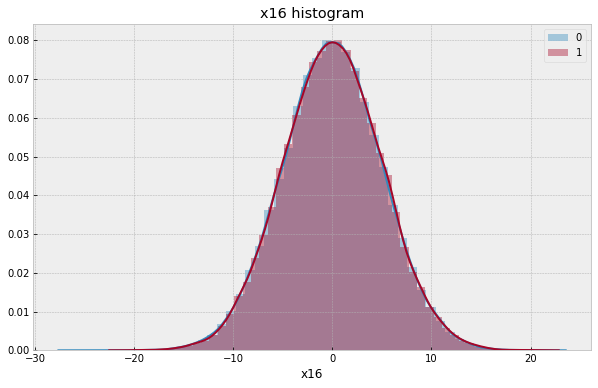

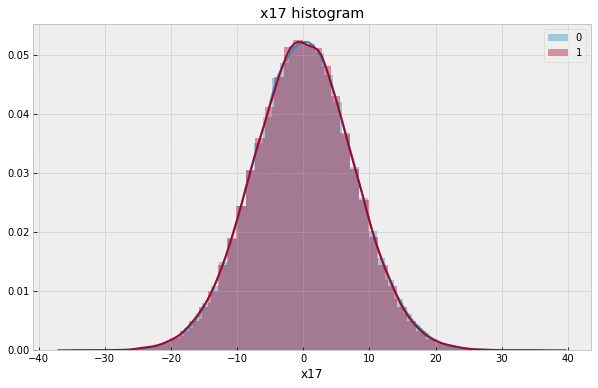

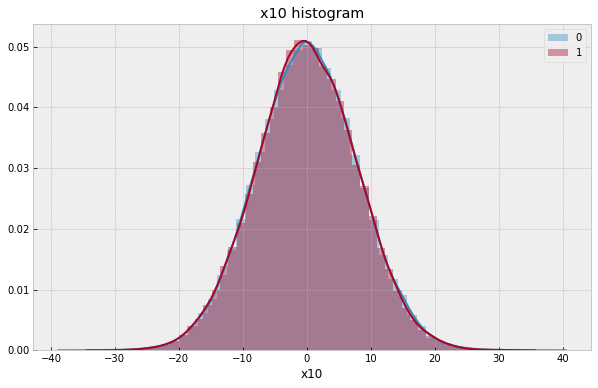

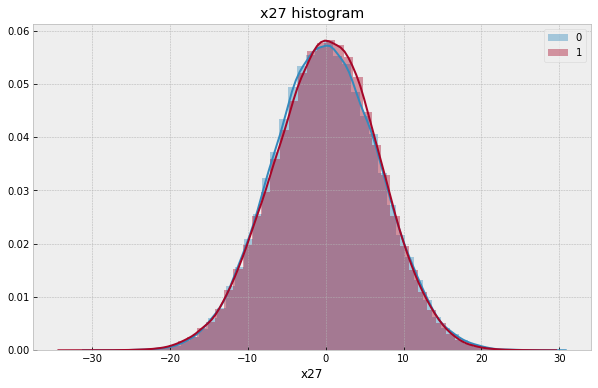

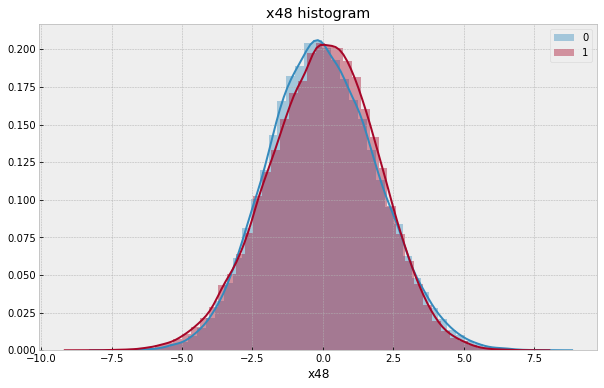

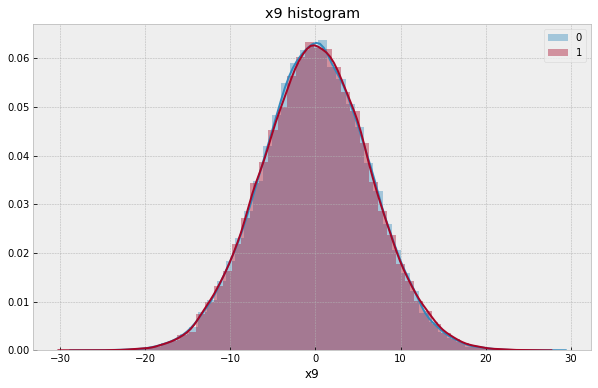

In [90]:
eda.plot_numeric(max_plots=20)

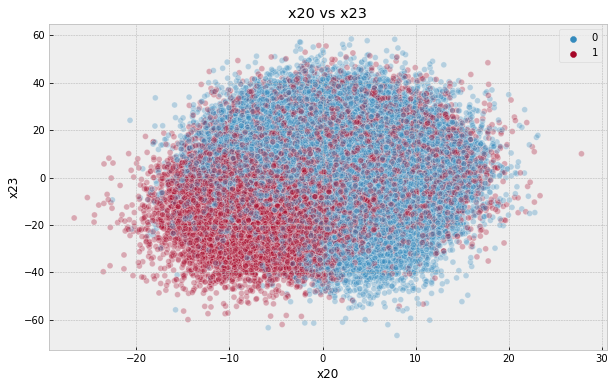

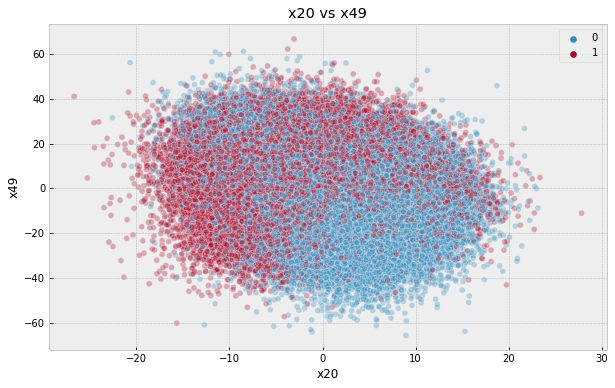

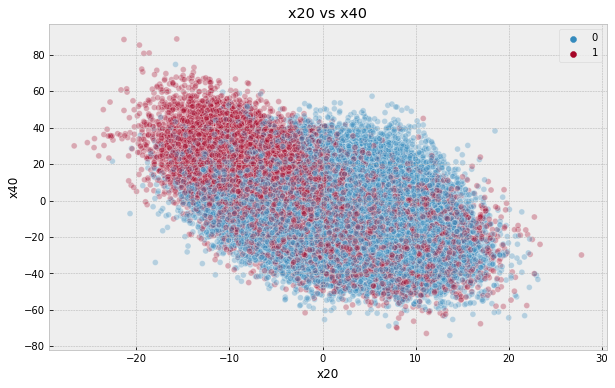

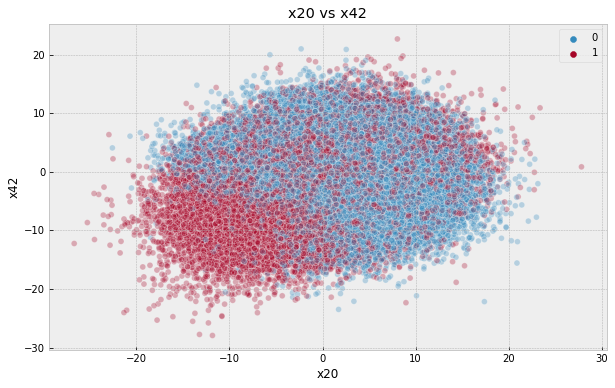

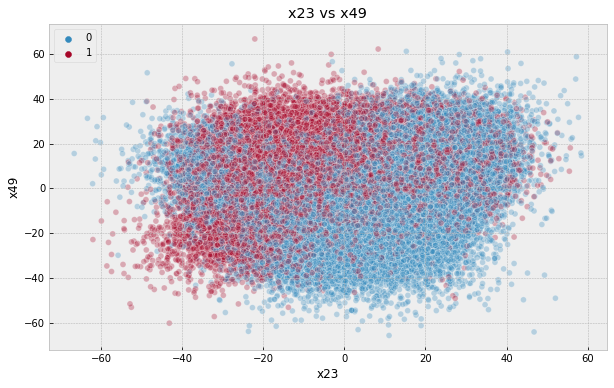

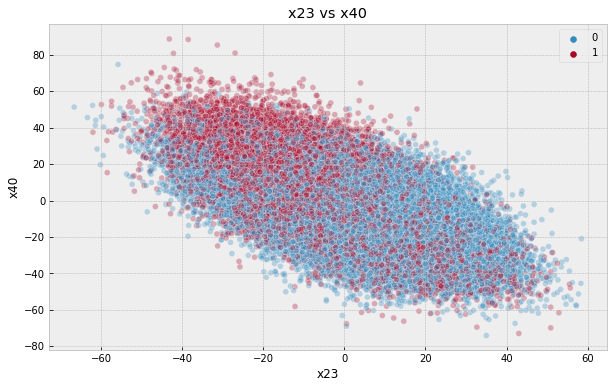

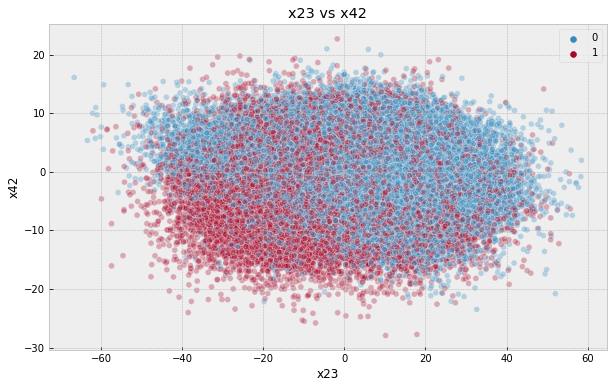

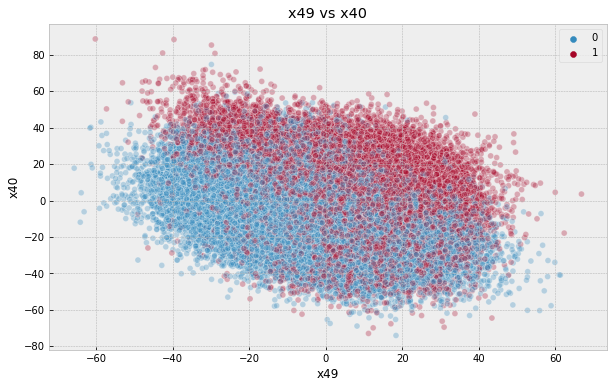

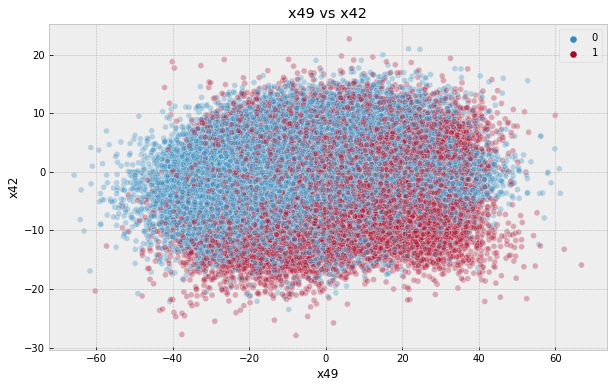

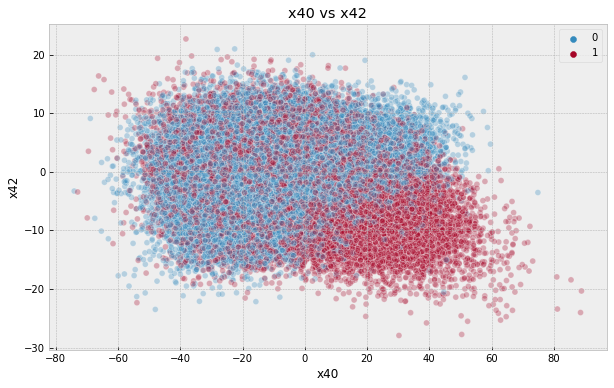

In [71]:
eda.plot_scatterplots(max_plots=10, alpha=0.3)

<AxesSubplot:>

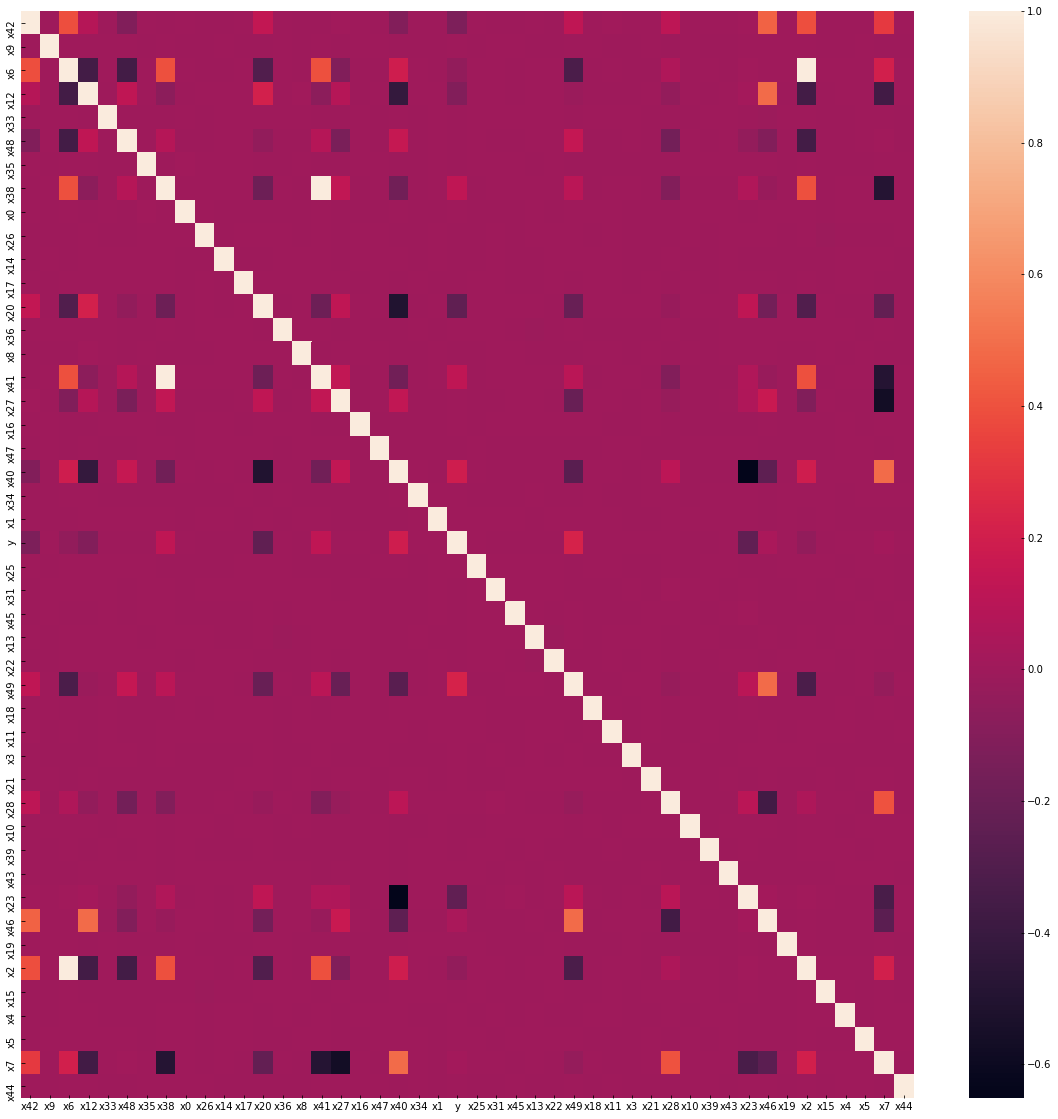

In [88]:
numeric_cols = set(df.select_dtypes(include=np.number).columns)

fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(df[numeric_cols].corr(), annot=False, ax=ax)

In [31]:
one_hot = pd.get_dummies(df)
y = one_hot['y']
X = one_hot.drop('y', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
rf_random_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15, 20, 30, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 6, 10, 30],
    'min_samples_split': [2, 10, 50],
    'n_estimators': [200, 400, 600, 800, 1000]
}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = rf_random_grid, 
    n_iter = 15, 
    scoring = 'roc_auc',
    cv = 4, 
    verbose=2, 
    random_state=1, 
    n_jobs = 6
)
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 191.7min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 787.7min finished


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=15, n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 30, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 10, 30],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=1, scoring='roc_auc', verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [41]:
best_rf = rf.set_params(**rf_random.best_params_)
best_rf.fit(X_train, y_train)
y_test_hat = best_rf.predict(X_test)
y_test_hat[y_test_hat >= 0.5] = 1
y_test_hat[y_test_hat < 0.5] = 0
print(roc_auc_score(y_test_hat, y_test))

0.9277012660459152
